# PS2 
### by Hristiana Vidinova

## 1. Descriptive statistics


### Import data on health claims amounts.

In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special as spc
import scipy.stats as sts
sns.set()

clms = np.loadtxt('C:/Users/Hrisi/Structural_estimation/StructEst_W18/ProblemSets/PS2/clms.txt')
print(clms[0:11])

[  361.65   123.04   541.77   862.9     55.6   3728.56    70.     730.63
   420.56    81.63   226.01]


### Get a sense of all the data by plotting the empirical cumulative function.

In [306]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

<IPython.core.display.Javascript object>


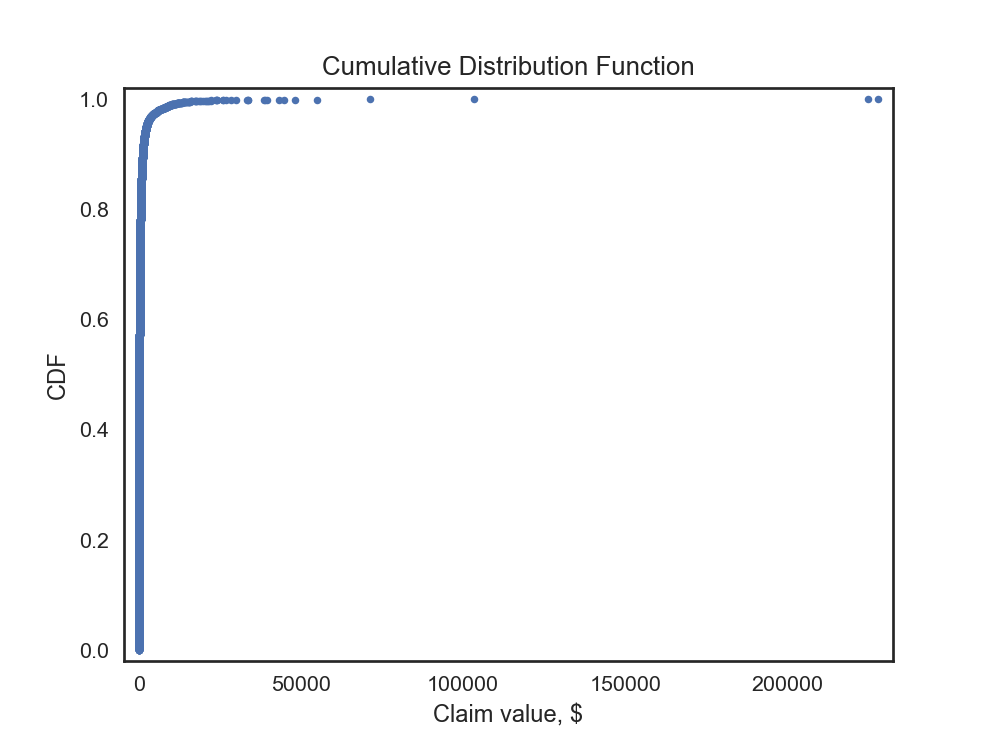

In [308]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_val, y_val = ecdf(clms)

# Generate plot
plt.plot(x_val, y_val, marker = '.', linestyle = 'none' )


# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel("Claim value, $")
_ = plt.ylabel ("CDF")
_ = plt.title("Cumulative Distribution Function")


# Display the plot
plt.show()

### Report descriptive statistics

In [324]:
print('Min: ', np.min(clms))
print('Mean: ', np.mean(clms))
print('Median: ', np.median(clms))
print('Max: ', np.max(clms))
print('Standard deviation: ', np.std(clms))
print('Number of observations: ', len(clms))
print('Number of missing values: ', len(clms[pd.Series(clms).isnull()]))

Min:  0.01
Mean:  720.277975327
Median:  172.21
Max:  227967.25
Standard deviation:  3972.66375639
Number of observations:  10619
Number of missing values:  0


### Histogram of all observations

<IPython.core.display.Javascript object>


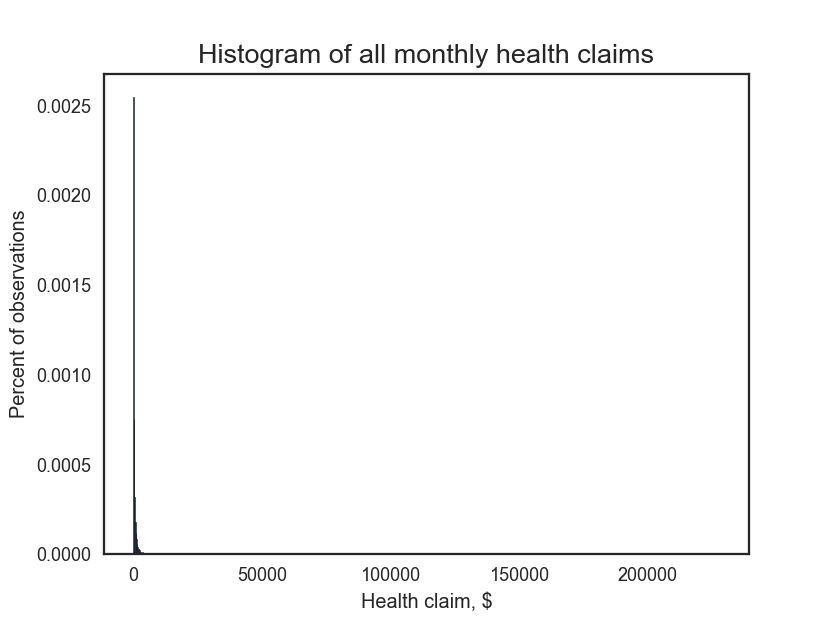

CDF=  1.0


Text(0,0.5,'Percent of observations')

In [420]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook
plt.hist(clms,1000, edgecolor='black', normed=True)
pdf, bins, patches = ax.hist(clms,1000, edgecolor='black', normed=True)
print ('CDF= ', np.sum(pdf * np.diff(bins)))
plt.title('Histogram of all monthly health claims', fontsize=15)
plt.xlabel('Health claim, $')
plt.ylabel('Percent of observations')

### Before looking at claims up to USD 800 , let us look at the histogram of claims below or equal to USD 3000 (cdf not adjusted).

<IPython.core.display.Javascript object>


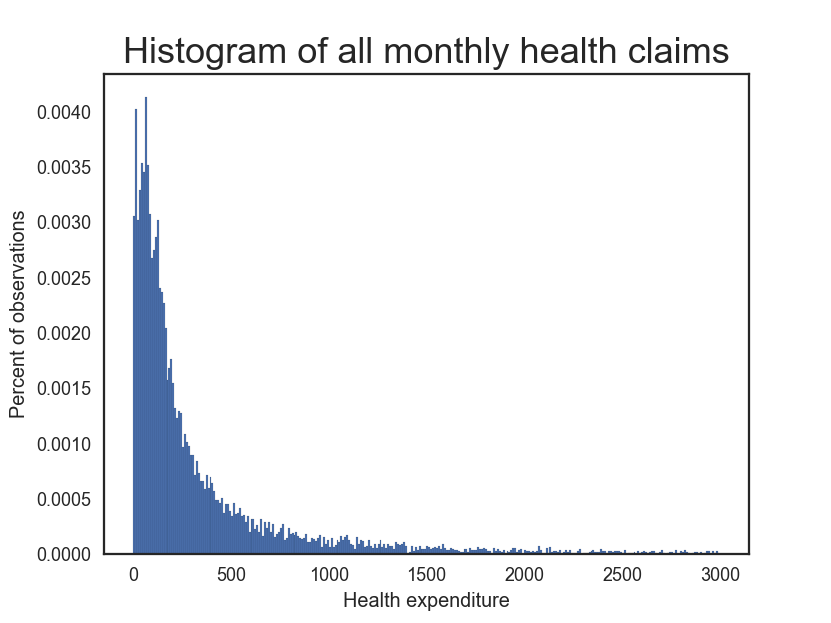

In [424]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook
count, bins, ignored = plt.hist(clms[clms<=3000], 300, edgecolor='black', normed=True, linewidth=0.05)
_ = plt.title('Histogram of all monthly health claims', fontsize=20)
_ = plt.xlabel('Health expenditure')
_ = plt.ylabel('Percent of observations')
plt.show()

### Histogram of the monthly health claims below or equal to $800. CDF is adjusted to 0.85.


<IPython.core.display.Javascript object>


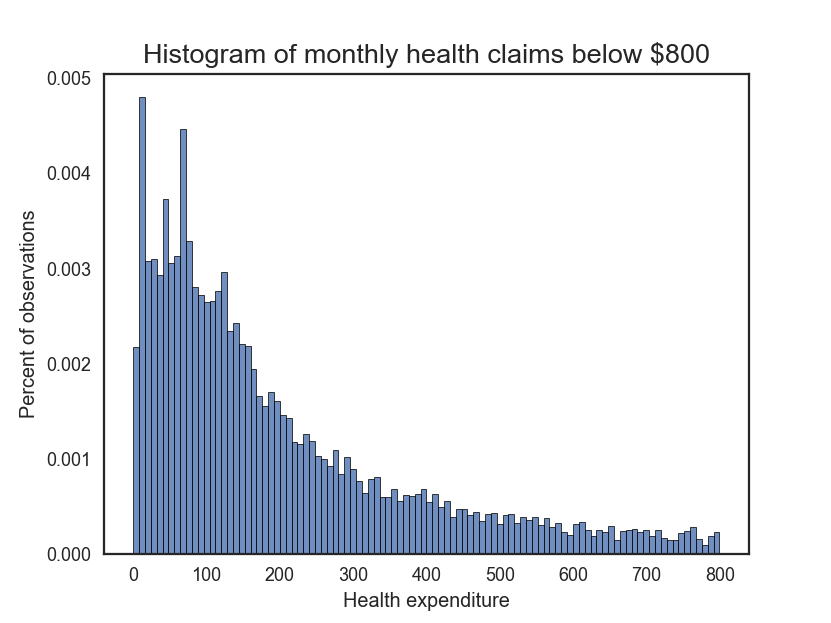

In [429]:
%matplotlib notebook
#count, bins, ignored = plt.hist(clms, edgecolor='black', normed=True)
count_800=len(clms[clms<=800])
count_all=len(clms)
adj=count_800/count_all
hist, bins = np.histogram(clms[clms<=800], bins=100,density=True )
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
_ = plt.bar(center, hist*adj, align='center', width=width, edgecolor='black', linewidth=0.5, alpha=0.8)
_ = plt.style.use('seaborn-white')
_ = plt.title('Histogram of monthly health claims below $800', fontsize=15)
_ = plt.xlabel('Health expenditure')
_ = plt.ylabel('Percent of observations')
plt.show()

## Compare the histograms:

#### The histogram of the whole distribution shows:
 * a very long tail going above USD 200 000, whose mass is so close to zero that it is not visible on the chart
 * a large mass at the relatively small monthly claims, but the exact values of these small claims cannot be distinguished
 
#### The historam of the claims below or equal to 800:
 * shows more clearly the distribution of claims close to USD 0, compared to the full histogram. For instance, we see that the largest mass appears up to USD 120, then it falls steeply up to around USD 300, and then it continues falling somehwat slowly above USD 300.
 * presents a big part of the whole distribution - around 85% of the CDF.
 
If we are interested main part of the distribution, which is concentrated at the small claims, rather than the tail, we may want to focus on the second histogram.
 


## 2. MLE based on the Gamma Distribution 

In [435]:
# PDF of a Gamma Distribution
def gamma_pdf(x,a,b):
    gamma_lik_val=b**(-a) * x**(a-1) * np.exp(-x/b)/spc.gamma(a)
    
    return gamma_lik_val

    

In [437]:
# Define log likelihood function for the gamma distribution
def log_lik_gamma(x, a, b):
    pdf_vals = gamma_pdf(x, a, b)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [438]:
# Define the criterion function for the gamma distribution
def crit(params, args):
    a, b = params
    x = args
    log_lik_val = log_lik_gamma(x, a, b)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [439]:
# MLE optimization procedure for the Gamma distribution
import scipy.optimize as opt


# Calculate initial values
std_x=np.std(clms)
var_x=std_x**2
mean_x=np.mean(clms)

beta=var_x/mean_x
alpha=mean_x/beta

# Set arguments of the opt.minimize function
bnds = ((0, None), (0, None))
params_init = np.array([alpha, beta])
mle_args = (clms)

# run the optimization procedure
results = opt.minimize(crit, params_init, args=(mle_args), bounds=bnds)

# report results
a_gamma, b_gamma = results.x
print('a_gamma=', a_gamma, ' b_gamma=', b_gamma)

a_gamma= 0.221755316795  b_gamma= 21911.0646993


In [440]:
results

      fun: 82076.451605663606
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09313226])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21755317e-01,   2.19110647e+04])

<IPython.core.display.Javascript object>


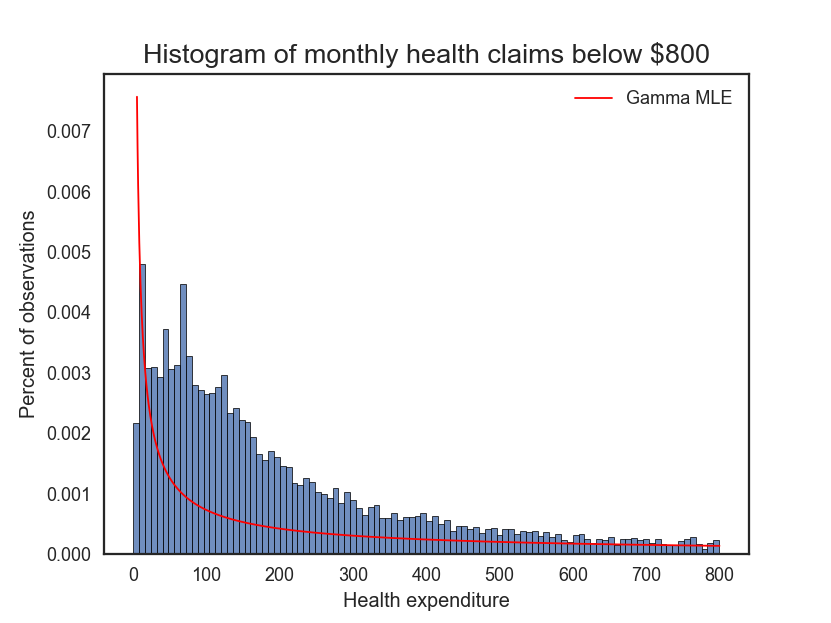

In [441]:
# Plot the histogram of the data
count_800=len(clms[clms<=800])
count_all=len(clms)
adj=count_800/count_all
hist, bins = np.histogram(clms[clms<=800], bins=100,density=True )
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
_ = plt.bar(center, hist*adj, align='center', width=width, edgecolor='black', linewidth=0.5, alpha=0.8)
_ = plt.style.use('seaborn-white')
_ = plt.title('Histogram of monthly health claims below $800', fontsize=15)
_ = plt.xlabel('Health expenditure')
_ = plt.ylabel('Percent of observations')

# Plot the MLE gamma estimated distribution

dist_pts=np.linspace(start=5, stop=800, num=1000)
_ = plt.plot(dist_pts, gamma_pdf(dist_pts, a_gamma, b_gamma),
         linewidth=1, color='r', label='Gamma MLE')
_ = plt.legend(loc='upper right')

plt.show()


## 3. MLE based on the Generalized Gamma Distribution 

In [442]:
# Define pdf of the generalized gamma distribution
def gengamma_pdf(x,a,b,m):
    gengamma_lik_val=m* x**(a-1) * np.exp(-(x/b)**m)/(b**a * spc.gamma(a/m))
    
    return gengamma_lik_val


In [444]:
# Define log likelihood function for the generalized gamma distribution
def log_lik_gengamma(x, a, b, m):
    pdf_vals = gengamma_pdf(x, a, b, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val


In [445]:
# Define criteron function for the generalized gamma distribution
def gengamma_crit(params, args):
    a, b, m = params
    x = args
    log_lik_val = log_lik_gengamma(x, a, b, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [446]:
# MLE optimization procedure for the generalized gamma distribution

# Set initial valuse
a_init = a_gamma  # mu_2
b_init = b_gamma # sig_2
m_init = 1
params_init = np.array([a_init, b_init, m_init])

# Set parameters of the opt.minimize function
bnds = ((0, None), (0, None), (0, None))
mle_args = (clms)
# run optimization
gengamma_results = opt.minimize(gengamma_crit, params_init, args=(mle_args), bounds=bnds)

# get and print results
a_gengamma, b_gengamma, m_gengamma = gengamma_results.x
print('a_gengamma=', a_gengamma, ' b_gengamma=', b_gengamma,' m_gengamma=', m_gengamma )

a_gengamma= 0.221737662012  b_gengamma= 21911.0644235  m_gengamma= 0.997093001892


In [447]:
gengamma_results

      fun: 82076.446788425383
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.64379957,  0.09167707, -1.04191713])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21737662e-01,   2.19110644e+04,   9.97093002e-01])

Compare the the log-likelihood of Gamma and Generalized Gamma MLE:

In [448]:
print('Log-likelihood Gamma: ', log_lik_gamma(clms, a_gamma, b_gamma))
print('Log-likelihood Genralized Gamma: ', log_lik_gengamma(clms, a_gengamma, b_gengamma, m_gengamma))

Log-likelihood Gamma:  -82076.4516057
Log-likelihood Genralized Gamma:  -82076.4467884


<IPython.core.display.Javascript object>


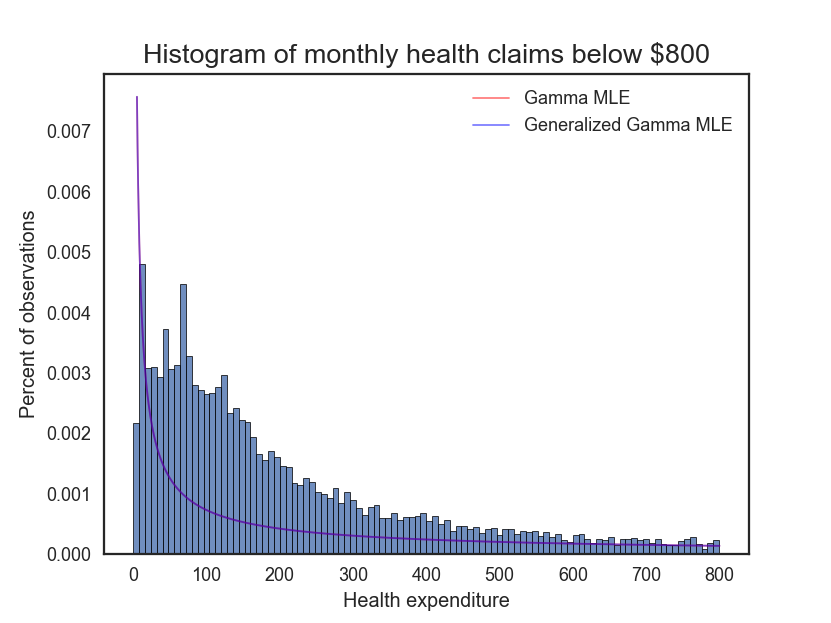

In [452]:
# Plot the histogram of the data
count_800=len(clms[clms<=800])
count_all=len(clms)
adj=count_800/count_all
hist, bins = np.histogram(clms[clms<=800], bins=100,density=True )
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
_ = plt.bar(center, hist*adj, align='center', width=width, edgecolor='black', linewidth=0.5, alpha=0.8)
_ = plt.style.use('seaborn-white')
_ = plt.title('Histogram of monthly health claims below $800', fontsize=15)
_ = plt.xlabel('Health expenditure')
_ = plt.ylabel('Percent of observations')

# Plot the MLE gamma estimated distribution

dist_pts=np.linspace(start=5, stop=800, num=1000)
_ = plt.plot(dist_pts, gamma_pdf(dist_pts, a_gamma, b_gamma),
         linewidth=1, alpha=0.5, color='r', label='Gamma MLE')
_ = plt.legend(loc='upper right')


# Plot the MLE gen gamma estimated distributin

_ = dist_pts=np.linspace(start=5, stop=800, num=1000)
_ = plt.plot(dist_pts, gengamma_pdf(dist_pts, a_gengamma, b_gengamma, m_gengamma),
         linewidth=1, alpha=0.5, color='b', label='Generalized Gamma MLE')
_ = plt.legend(loc='upper right')
plt.show()

## 4. MLE based on the Generalized Beta 2 distribution

In [454]:
# Define the generalized beta 2 density function:
def genbeta2_pdf(x,a,b,p,q):
    
    genbeta2_lik_val= a* x**(a*p-1)/(b**(a*p) * spc.beta(p,q) * (1 + (x/b)**a) **(p+q))
        
    return genbeta2_lik_val


In [455]:
# Define log likelihood function for the generalized beta 2 distribution
def log_lik_genbeta2(x, a, b, p, q):
    pdf_vals = genbeta2_pdf(x, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val


In [456]:
# Define optimization criterion function for the generalized beta 2 distribution
def genbeta2_crit(params, args):
    a, b, p, q = params
    x = args
    log_lik_val = log_lik_genbeta2(x, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [497]:
# MLE optimization procedure for the generalized beta 2 distribution

#set initial values
q_init = 10000
a_init = m_gengamma
b_init = q_init**(1/m_gengamma)*b_gengamma
p_init = a_gengamma/m_gengamma
params_init = np.array([a_init, b_init, p_init, q_init])
mle_args = (clms)

bnds = ((0, None), (0, None), (0, None), (0, None))

# run opt,minimize
genbeta2_results = opt.minimize(genbeta2_crit, params_init, args=(mle_args), bounds=bnds)


In [498]:
# get and print results
a_genbeta2, b_genbeta2, p_genbeta2, q_genbeta2 = genbeta2_results.x
print('a_init=', a_init, ' b_init=', b_init, ' p_init=', p_init, ' q_init=', q_init )
print('a_genbeta2=', a_genbeta2, ' b_genbeta2=', b_genbeta2, ' p_genbeta2=', p_genbeta2, ' q_genbeta2=', q_genbeta2)

a_init= 0.997093001892  b_init= 225074020.761  p_init= 0.222384132263  q_init= 10000
a_genbeta2= 0.699231865557  b_genbeta2= 225074020.761  p_genbeta2= 0.994981535357  q_genbeta2= 9999.64535616


In [499]:
genbeta2_results

      fun: 76460.008700629347
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-21.24579623,   0.        ,  34.99008017, -14.35400918])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 160
      nit: 14
   status: 0
  success: True
        x: array([  6.99231866e-01,   2.25074021e+08,   9.94981535e-01,
         9.99964536e+03])

Compare the the log-likelihood of Gamma, Generalized Gamma and Beta 2 MLE:

In [500]:
print('Log-likelihood Gamma: ', log_lik_gamma(clms, a_gamma, b_gamma))
print('Log-likelihood Genralized Gamma: ', log_lik_gengamma(clms, a_gengamma, b_gengamma, m_gengamma))
print('Log-likelihood Beta 2: ', log_lik_genbeta2(clms, a_genbeta2, b_genbeta2, p_genbeta2, q_genbeta2))

Log-likelihood Gamma:  -82076.4516057
Log-likelihood Genralized Gamma:  -82076.4467884
Log-likelihood Beta 2:  -76460.0087006


<IPython.core.display.Javascript object>


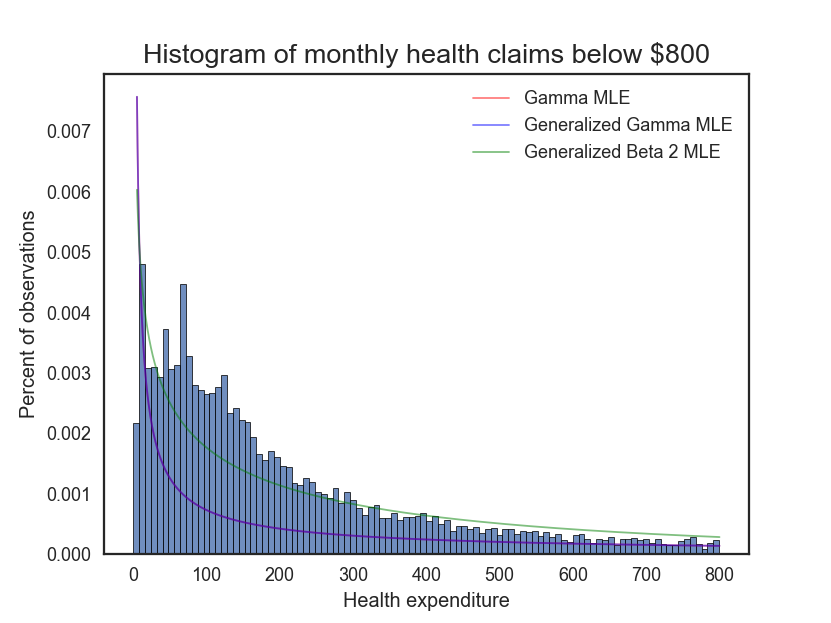

In [501]:
# Plot the histogram of the data
count_800=len(clms[clms<=800])
count_all=len(clms)
adj=count_800/count_all
hist, bins = np.histogram(clms[clms<=800], bins=100,density=True )
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
_ = plt.bar(center, hist*adj, align='center', width=width, edgecolor='black', linewidth=0.5, alpha=0.8)
_ = plt.style.use('seaborn-white')
_ = plt.title('Histogram of monthly health claims below $800', fontsize=15)
_ = plt.xlabel('Health expenditure')
_ = plt.ylabel('Percent of observations')

# Plot the MLE gamma estimated distribution

dist_pts=np.linspace(start=5, stop=800, num=1000)
_ = plt.plot(dist_pts, gamma_pdf(dist_pts, a_gamma, b_gamma),
         linewidth=1, alpha=0.5, color='r', label='Gamma MLE')
_ = plt.legend(loc='upper right')


# Plot the MLE gen gamma estimated distributin

_ = dist_pts=np.linspace(start=5, stop=800, num=1000)
_ = plt.plot(dist_pts, gengamma_pdf(dist_pts, a_gengamma, b_gengamma, m_gengamma),
         linewidth=1, alpha=0.5, color='b', label='Generalized Gamma MLE')
_ = plt.legend(loc='upper right')


# Plot the MLE gen beta 2 estimated distributin

_ = plt.plot(dist_pts, genbeta2_pdf(dist_pts, a_genbeta2, b_genbeta2, p_genbeta2, q_genbeta2),
         linewidth=1, alpha=0.5, color='g', label='Generalized Beta 2 MLE')
_ = plt.legend(loc='upper right')
plt.show()

## 5. Likelihood ratio test


In [502]:
log_lik_gamma = log_lik_gamma(clms, a_gamma, b_gamma)
log_lik_gengamma = log_lik_gengamma(clms, a_gengamma, b_gengamma, m_gengamma)
log_lik_genbeta2 = log_lik_genbeta2(clms, a_genbeta2, b_genbeta2, p_genbeta2, q_genbeta2)

LR_val_gamma = 2 * (log_lik_genbeta2 - log_lik_gamma)
pval_gamma = 1.0 - sts.chi2.cdf(LR_val_gamma, 4)

LR_val_gengamma = 2 * (log_lik_genbeta2 - log_lik_gengamma)
pval_gengamma = 1.0 - sts.chi2.cdf(LR_val_gengamma, 4)

print('chi squared of GB2 vs. GA with 4 degrees of freedom p-value = ', pval_gamma)
print('chi squared of GB2 vs. GG with 4 degrees of freedom p-value = ', pval_gengamma)



chi squared of GB2 vs. GA with 4 degrees of freedom p-value =  0.0
chi squared of GB2 vs. GG with 4 degrees of freedom p-value =  0.0


We can reject the null hypothesis that the likelihoods of GB2 and GA are statistically the same. 
We can reject the null hypothesis that the likelihoods of GB2 and GG are statistically the same.

In other words, the generalized beta 2 yields higher likelihood than the gamma and generalized gamma MLE.

## 6. Cumulative GB2 and GA distributions

In [513]:
# define gamma cdf (theoretical)
def gamma_cdf(x,a,b):
    gamma_cdf_val = spc.gammainc(a, x/b)
    
    return gamma_cdf_val

print(1-gamma_cdf(1000, a_gamma, b_gamma))



0.451959735196


In [505]:
# define gamma cdf - numerical approximation

def integrate_gamma(a, b, N):
    x = np.linspace(a+(b-a)/(2*N), b-(b-a)/(2*N), N)
    fx = gamma_pdf(x,a_gamma, b_gamma)
    area = np.sum(fx)*(b-a)/N
    return area



In [515]:
print("Prob of a claim above 1000, based on GA is: ", 1-integrate_gamma(0, 1000, 100000000))

Prob of a claim above 1000, based on GA is:  0.457780649696


In [507]:
def integrate_genbeta2(a, b, N):
    x = np.linspace(a+(b-a)/(2*N), b-(b-a)/(2*N), N)
    fx = genbeta2_pdf(x,a_genbeta2, b_genbeta2, p_genbeta2, q_genbeta2)
    area = np.sum(fx)*(b-a)/N
    return area


In [512]:
print("Prob of a claim above 1000, based on GB2 is: ", 1-integrate_genbeta2(0, 1000, 100000000))

Prob of a claim above 1000, based on GB2 is:  0.162544574065
